In [1]:
from vmtk import vmtkscripts, vtkvmtk
import numpy as np
import vtk
import matplotlib.pyplot as plt 

In [2]:
imageReader = vmtkscripts.vmtkImageReader()
imageReader.InputFileName = '/home/jiehyun.kim001/Desktop/62.img.nrrd'
imageReader.Execute()

Spacing 0.679688 0.679688 1.500000
Origin 173.660156 356.660156 1019.000000
Dimensions 512 512 268


In [3]:
#imageNumpyAdaptor = vmtkscripts.vmtkImageToNumpy()
#imageNumpyAdaptor.Image = imageReader.Image
#imageNumpyAdaptor.Execute()
#numpyImage = imageNumpyAdaptor.ArrayDict

In [4]:
#numpyImage

In [5]:
#image = numpyImage['PointData']['ImageScalars']

In [6]:
#plt.imshow(image[:,:,0])
#plt.show()

In [7]:
imageReader_ca = vmtkscripts.vmtkImageReader()
imageReader_ca.InputFileName = '/home/jiehyun.kim001/Desktop/common_carotid_artery_right.nii.gz'
imageReader_ca.Execute()

Spacing 0.679688 0.679688 1.500000
Origin 173.660156 356.660156 1019.000000
Dimensions 512 512 268


In [8]:
#imageNumpyAdaptor_ca = vmtkscripts.vmtkImageToNumpy()
#imageNumpyAdaptor_ca.Image = imageReader_ca.Image
#imageNumpyAdaptor_ca.Execute()
#numpyImage_ca = imageNumpyAdaptor_ca.ArrayDict

In [9]:
#numpyImage_ca

In [10]:
#CA = numpyImage_ca['PointData']['ImageScalars']

In [11]:
#for i in range(268):
#plt.imshow(CA[:,:,52])
#plt.show()

In [12]:
vmtklevelset = vmtkscripts.vmtkLevelSetSegmentation()

In [13]:
#vmtklevelset.Image = '/home/jiehyun.kim001/Desktop/62_img.nrrd'
vmtklevelset.Image = imageReader.Image
#vmtklevelset.Image = image
#vmtklevelset.LevelSetsInput = '/home/jiehyun.kim001/Desktop/common_carotid_artery_right.nii.gz'
#vmtklevelset.LevelSetsInput = imageReader_ca.Image
vmtklevelset.LevelSetsOutput = '/home/jiehyun.kim001/Desktop/output_12.nrrd'
vmtklevelset.LevelSets = imageReader_ca.Image
#vmtklevelset.LevelSetsType = 'threshold'
#vmtklevelset.UpperThreshold = 1150.0
#vmtklevelset.LowerThreshold = 135.0
vmtklevelset.NumberOfIterations = 10
#vmtklevelset.setInputMembers= vmtklevelset.Image, vmtklevelset.LevelSetsInput,
#vmtklevelset.SetOutputMembers= (LevelSets, FeatureImages)

In [14]:
vmtklevelset.Execute()

In [15]:
outputimage = vmtklevelset.SetOutputMembers('FeatureImage')
levelset = vmtklevelset.SetOutputMembers('LevelSets')

In [16]:
output = vmtklevelset.FeatureImage

In [17]:
lvst = vmtklevelset.LevelSets

In [18]:
output.GetDimensions()

(512, 512, 268)

In [19]:
lvst.GetDimensions()

(0, 0, 0)

In [20]:
imageNumpyAdaptor_o = vmtkscripts.vmtkImageToNumpy()
imageNumpyAdaptor_o.Image = output
imageNumpyAdaptor_o.Execute()
numpyImage_o = imageNumpyAdaptor_o.ArrayDict

wrapping vtkDataObject
setting origin
setting dimensions
setting spacing
writing point data: 


In [21]:
#numpyImage_o

In [22]:
output_img = numpyImage_o['PointData']['ImageScalars']

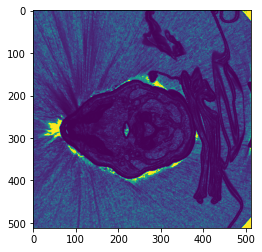

In [27]:
#for i in range(268):
plt.imshow(output_img[:,:,120])
plt.show()

In [28]:
imageNumpyAdaptor_oCA = vmtkscripts.vmtkImageToNumpy()
imageNumpyAdaptor_oCA.Image = lvst
imageNumpyAdaptor_oCA.Execute()
numpyImage_oCA = imageNumpyAdaptor_oCA.ArrayDict

wrapping vtkDataObject
setting origin
setting dimensions
setting spacing
writing point data: 


In [29]:
numpyImage_oCA 

{'Origin': array([ 173.66015625,  356.66015625, 1019.        ]),
 'Dimensions': array([0, 0, 0]),
 'Spacing': array([0.6796875, 0.6796875, 1.5      ]),
 'PointData': {'ImageScalars': array([], shape=(0, 0, 0), dtype=uint8)}}

In [30]:
output_oCA = numpyImage_oCA['PointData']['ImageScalars']

In [31]:
plt.imshow(output_oCA[:,:,120])
plt.show()

IndexError: index 120 is out of bounds for axis 2 with size 0